# Lab 2: Hand Gesture Recognition

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://drive.google.com/file/d/1SooJNgYj2T-7tssM6MXBc1MPvS_sRwZA/view?usp=sharing

# Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

# Part B. Building a CNN [40 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

First let's import the packages 

In [ ]:
import numpy as np
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import time
import torch
import torch.nn as nn

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
! unzip '/content/gdrive/MyDrive/Colab Notebooks/Lab2 MIE1517/Lab_2_Hand_Gesture_Dataset.zip'

Archive:  /content/gdrive/MyDrive/Colab Notebooks/Lab2 MIE1517/Lab_2_Hand_Gesture_Dataset.zip
   creating: Lab_3b_Gesture_Dataset/A/
  inflating: Lab_3b_Gesture_Dataset/A/1_A_1.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/1_A_2.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/1_A_3.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/10_A_1.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/10_A_2.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/10_A_3.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/100_A_1.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/100_A_2.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/100_A_3.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/101_A_1.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/101_A_2.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/101_A_3.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/102_A_1.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/102_A_2.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/102_A_3.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/11_A_1.jpg  
  inflating: Lab_3b_Gesture_Dataset/A/11_A_2.

### Part 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/master/torchvision/datasets.html#imagefolder
) 

I will split the data is 70 % training and 15 % validation and 15% testing set. I will use random_split that will select randomly images to be in training, testing and validation. we will always keep the same seed.
 i will use https://pytorch.org/vision/stable/datasets.html

In [ ]:
#transforming our data tensors
#CENTER_CROP :- Scale the image uniformly (maintain the image's aspect ratio) so 
#that both dimensions (width and height) of the image will be equal to or larger than the corresponding dimension of the view (minus padding)
data = torchvision.datasets.ImageFolder('/content/Lab_3b_Gesture_Dataset',transform=transforms.Compose([transforms.CenterCrop(224),transforms.ToTensor()]))
def get_data_loader(data,batch_size):
    #split the 70% training, 15 % testing and 15% validation https://pytorch.org/docs/stable/data.html
    train_sampler,val_sampler,test_sampler=torch.utils.data.random_split(data,[int(len(data)*0.7),int(len(data)*0.15+1),int(len(data)*0.15+1)],generator=torch.Generator().manual_seed(32))
    # shuffle (bool, optional) – set to True to have the data reshuffled at every epoch (default: False).
    # divide them in batches
    train_loader = torch.utils.data.DataLoader(train_sampler, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_sampler, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_sampler, batch_size=batch_size, shuffle=True)
    return train_loader, val_loader, test_loader
train_loader, val_loader, test_loader=get_data_loader(data,64)

### Part 2. Model Building and Sanity Checking [9 pt]

### Part (a) Convolutional Network - 3 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

I will try to immitate Lenet architecture (or AlexNet) as as start and then see the results. Let's start with imitating the LeNet Architecture (attached below in the picture) since we only have few samples so we do not need alot of parameters to train i.e go deeper in the convolutional layers. After trying many different architectures resembling Lenet I choose the one highlighted in the picture below since it gave the most acceptable results:
1- Convolutional layer 1 with kernel size 5 by 5 and stride=1 the number of channels will be 3 since we have an RBG image + Pooling 2 strides and size 2 layer to consolidate the image and reduce the size of the orignal image
2- Convolutional layer 2 with kernel size 5 by 5 + Pooling 2 strides and size 2 layer to consolidate the image and reduce the size of the orignal image.
3- Fully connected layer 1 and fully connected layer 2
4- After each Convolution and Fully connected layer 1 I will use Relu activation function as higlighted in prelab 2 A on MNIST dataset below. The reference for how to code was taken from prelab 2

5- For channels our image is first RGB so contains 3 channels as input. Then the output channels are 5 from the conv1 and then goes into a pooling layer. After that into another convolutional layer with output channel = 10 also like the one on the slides and then into another pooling layer to consolidate the information and after that we input 55353 to a FC layer with output 32 and to another FC layer with output 9 which is the number of classes.

Code used as inspiration from prelab2A 


    class MNISTClassifier(nn.Module):
      def __init__(self):
          super(MNISTClassifier, self).__init__()
          self.conv1 = nn.Conv2d(1, 5, 5) #in_channels, out_chanels, kernel_size
          self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
          self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels,kernel_size
          self.fc1 = nn.Linear(160, 32)
          self.fc2 = nn.Linear(32, 10)

      def forward(self, x):
          x = self.pool(F.relu(self.conv1(x)))
          x = self.pool(F.relu(self.conv2(x)))
          x = x.view(-1, 160)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x
      
      print('Convolutional Neural Network Architecture Selected')

Architecture for the model that we are constructing 

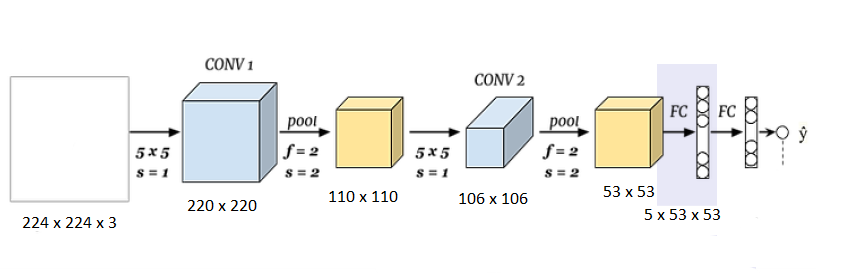

In [ ]:
class HandClassiferCNN(nn.Module):
  def __init__(self):
    # The Python super() method lets you access methods in a parent class
    # You can think of super() as a way to jump up 
    # to view the methods in the class from which another class is inherited. 
    super(HandClassiferCNN, self).__init__()
    self.name="HandClassifer_1"
    # convolution 1 3 input channels since RGB
    self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
    self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
    # convolution 2
    self.conv2 = nn.Conv2d(5, 5, 5) #in_channels, out_chanels, kernel_size
    # flattened (why 53 is from formula)
    self.fc1 = nn.Linear(5*53*53, 32)
    # the output layer should be 9 since we need to predict 9 classes 
    self.fc2 = nn.Linear(32, 9)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 5*53*53)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

### Part (b) Training Code - 3 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

https://pyimagesearch.com/2021/07/19/pytorch-training-your-first-convolutional-neural-network-cnn/ and lab 1 starter functions and prelab2A code for training the CNN <br>

- Optimizer used is SGD we could also used adam but adam is more useful when doing SGD and here we have batches so it doesnt matter alot
- Loss is cross entropy loss since we are not solving a regression problem, it is the most suitable loss for our application

In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels


def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_accuracy=0.0
    total_epoch = 0
    for i, data in enumerate(loader,0):
      inputs, labels=data
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      corr=(torch.argmax(outputs, axis=1)== labels)
      total_accuracy += int(corr.sum())
      total_loss += loss.item()
      total_epoch += len(labels)
    err = 1-(float(total_accuracy) / total_epoch)
    loss = float(total_loss) / (i + 1)
    return err, loss


def train_net(net,data, batch_size=64, learning_rate=0.01, num_epochs=30):
    torch.manual_seed(100)
    train_loader, val_loader, test_loader = get_data_loader(data,batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    start_time = time.time()
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_train_accuracy = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader,0):
          inputs, labels=data
          if use_cuda and torch.cuda.is_available():
            inputs = inputs.cuda()
            labels = labels.cuda()
          optimizer.zero_grad()
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          corr=(torch.argmax(outputs, axis=1) == labels)
          total_train_accuracy += int(corr.sum())
          total_train_loss += loss.item()
          total_epoch += len(labels)
        train_err[epoch] = 1-(float(total_train_accuracy) / total_epoch)
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+"Validation err: {}, Validation loss: {}").format(epoch + 1,train_err[epoch],train_loss[epoch],val_err[epoch],val_loss[epoch]))

        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)



In [ ]:
Net= HandClassiferCNN()

use_cuda = True

if use_cuda and torch.cuda.is_available():
  Net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(Net, data,batch_size=64, learning_rate=0.01, num_epochs=30)

CUDA is available!  Training on GPU ...
Epoch 1: Train err: 0.890652557319224, Train loss: 2.2003977563646107 |Validation err: 0.863013698630137, Validation loss: 2.1956820487976074
Epoch 2: Train err: 0.890652557319224, Train loss: 2.1979203312485307 |Validation err: 0.863013698630137, Validation loss: 2.1969178517659507
Epoch 3: Train err: 0.8677248677248677, Train loss: 2.1908166585145175 |Validation err: 0.8794520547945206, Validation loss: 2.18068265914917
Epoch 4: Train err: 0.763668430335097, Train loss: 2.023261869395221 |Validation err: 0.6465753424657534, Validation loss: 1.6934312383333843
Epoch 5: Train err: 0.5114638447971782, Train loss: 1.4327719034972015 |Validation err: 0.4602739726027397, Validation loss: 1.4569336573282878
Epoch 6: Train err: 0.37507348618459735, Train loss: 1.127329119929561 |Validation err: 0.33698630136986296, Validation loss: 1.137356122334798
Epoch 7: Train err: 0.3433274544385656, Train loss: 1.0391010332990576 |Validation err: 0.36986301369863

Our train error is close to 0 at epoch 29 and 30. We are  overfitting so we might need to spot before or change our model or better tune our hyperparameters.

From lab 1 code copy pasted 

In [ ]:
# Training Curve taken from lab1

def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

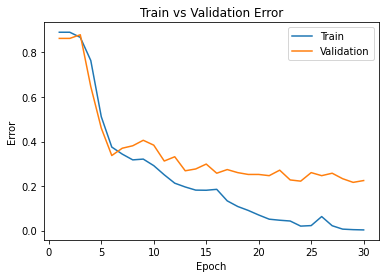

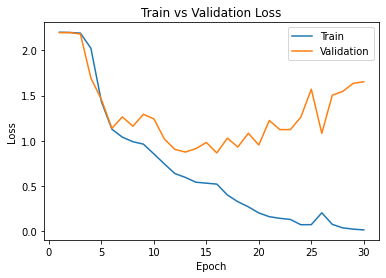

In [ ]:
model_path = get_model_name("HandClassifer_1", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path)

### Part (c) “Overfit” to a Small Dataset - 3 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [ ]:
!unzip '/content/gdrive/MyDrive/Colab Notebooks/Lab2 MIE1517/Yassine_1008618113.zip'

Archive:  /content/gdrive/MyDrive/Colab Notebooks/Lab2 MIE1517/Yassine_1008618113.zip
replace Yassine_1008618113/A/1008618113_A_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data2=torchvision.datasets.ImageFolder('/content/Yassine_1008618113',transform=transforms.Compose([transforms.CenterCrop(224),transforms.ToTensor()]))

In [ ]:
data2=torchvision.datasets.ImageFolder('/content/Yassine_1008618113',transform=transforms.Compose([transforms.CenterCrop(224),transforms.ToTensor()]))
torch.manual_seed(7)
torch.cuda.empty_cache()
train_small_dataset=torch.utils.data.DataLoader(data2,shuffle=True)

Net= HandClassiferCNN()

use_cuda = True

if use_cuda and torch.cuda.is_available():
  Net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')


CUDA is available!  Training on GPU ...


In [ ]:
#train_loader2, val_loader2, test_loader2 = get_data_loader(batch_size=20)

torch.manual_seed(3)
torch.cuda.empty_cache()

train_loader2=torch.utils.data.DataLoader(data2, batch_size=64)
Net= HandClassiferCNN()

use_cuda = True

if use_cuda and torch.cuda.is_available():
  Net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

optimizer = optim.SGD(Net.parameters(), lr =0.001, momentum=0.9) #note i changed to Adam because it takes into account several things such as adaptive learning rate, momentum... and this will be helpful to prove the overfitting.
criterion = nn.CrossEntropyLoss()

epochs=200
train_err = np.zeros(int(epochs))
train_loss = np.zeros(int(epochs))
val_err = np.zeros(int(epochs))
val_loss = np.zeros(int(epochs))


for epoch in range(int(epochs)):
  total_train_loss = 0.0
  total_train_err = 0.0
  total_train_accuracy = 0.0
  total_epoch = 0
  for images,labels in iter(train_loader2):
    if use_cuda and torch.cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()
    outputs = Net(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    corr=(torch.argmax(outputs, axis=1) == labels)
    total_train_accuracy += int(corr.sum())
    total_train_loss += loss.item()
    total_epoch+=len(labels)
  train_err[epoch] = 1-(float(total_train_accuracy) / total_epoch)
  train_loss[epoch] = float(total_train_loss) / (27)

  print(("Epoch {}: Train err: {}, Train loss: {}").format(epoch + 1,train_err[epoch],train_loss[epoch]))

CUDA is available!  Training on GPU ...
Epoch 1: Train err: 0.8888888888888888, Train loss: 0.08151385519239637
Epoch 2: Train err: 0.8888888888888888, Train loss: 0.08151130323056821
Epoch 3: Train err: 0.8888888888888888, Train loss: 0.08150717947218153
Epoch 4: Train err: 0.8888888888888888, Train loss: 0.0815010424013491
Epoch 5: Train err: 0.8888888888888888, Train loss: 0.08149290967870641
Epoch 6: Train err: 0.8888888888888888, Train loss: 0.08148239277027271
Epoch 7: Train err: 0.8888888888888888, Train loss: 0.0814706219567193
Epoch 8: Train err: 0.8888888888888888, Train loss: 0.08145962821112739
Epoch 9: Train err: 0.8888888888888888, Train loss: 0.08144807815551758
Epoch 10: Train err: 0.8888888888888888, Train loss: 0.08143583050480595
Epoch 11: Train err: 0.8888888888888888, Train loss: 0.08142309718661839
Epoch 12: Train err: 0.8888888888888888, Train loss: 0.0814101431104872
Epoch 13: Train err: 0.8888888888888888, Train loss: 0.08139652676052517
Epoch 14: Train err: 0.

This confirms that the model is capable of overfitting since the training error is 0 and the loss is very very small.

### Part 3. Hyperparameter Search [8 pt]

### Part (a) - 2 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

I will choose:
1- For architecture add the number and size of the kernels in each convolution layer / the number of conv-pooling layers
2- Batch size and learning rate (those are two but a good practice is when we decrease the bacth size is to decrease the linear rate). T
3- Number of epochs Extra try: Apply drop-out to our CNN to see if it can prevent overfitting

I believe for the fully connected layers it is sufficient to have FC1 and FC2 only.

### Part (b) - 2 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

**Hyperparameter 1:** Add one extra convolutional layer with pooling layer of in 5 and out 5 same as before --> this will let the model more able to learn features since we added more convolutional layers.

In [ ]:
class HandClassiferCNN2(nn.Module):
  def __init__(self):
    # The Python super() method lets you access methods in a parent class
    # You can think of super() as a way to jump up 
    # to view the methods in the class from which another class is inherited. 
    super(HandClassiferCNN2, self).__init__()
    self.name="HandClassifier_2"
    # convolution 1 3 input channels since RGB
    self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
    self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
    # convolution 2
    self.conv2 = nn.Conv2d(5, 5, 5) #in_channels, out_chanels, kernel_size
    # convolution 3
    self.conv3 = nn.Conv2d(5, 5, 5)

    self.fc1 = nn.Linear(5*24*24, 32)
    # the output layer should be 9 since we need to predict 9 classes 
    self.fc2 = nn.Linear(32, 9)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x=self.pool(F.relu(self.conv3(x)))

    x = x.view(-1, 5*24*24)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
Net=HandClassiferCNN2()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  Net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
train_net(Net,data, batch_size=64, learning_rate=0.01, num_epochs=30)

Epoch 1: Train err: 0.8783068783068784, Train loss: 2.199521921299122 |Validation err: 0.904109589041096, Validation loss: 2.1986223459243774
Epoch 2: Train err: 0.8565549676660787, Train loss: 2.1911763085259333 |Validation err: 0.904109589041096, Validation loss: 2.180978695551554
Epoch 3: Train err: 0.7671957671957672, Train loss: 2.0870143660792597 |Validation err: 0.673972602739726, Validation loss: 1.909570078055064
Epoch 4: Train err: 0.630217519106408, Train loss: 1.6897419955995348 |Validation err: 0.6164383561643836, Validation loss: 1.8454849322636921
Epoch 5: Train err: 0.5455614344503233, Train loss: 1.4478979154869362 |Validation err: 0.4931506849315068, Validation loss: 1.3304652571678162
Epoch 6: Train err: 0.47971781305114636, Train loss: 1.271775331762102 |Validation err: 0.4794520547945206, Validation loss: 1.3597641189893086
Epoch 7: Train err: 0.3868312757201646, Train loss: 1.1371560162968106 |Validation err: 0.37534246575342467, Validation loss: 1.171610752741495

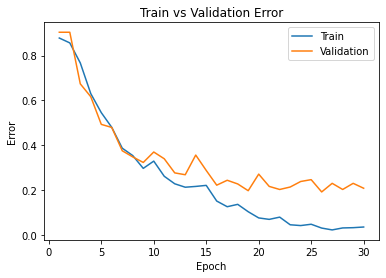

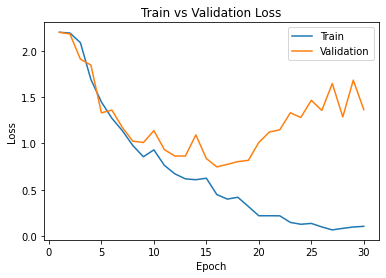

In [ ]:
model_path_2= get_model_name("HandClassifier_2", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path_2)

The modle is overfitting after epoch 11. We may do better for sure or we could try to decrease the number of epochs to prevent overfitting.

**Hyperparameter 2:** Add drop out after each conv and pooling


https://wandb.ai/authors/ayusht/reports/Implementing-Dropout-in-PyTorch-With-Example--VmlldzoxNTgwOTE

In [ ]:
class HandClassiferCNN3(nn.Module):
  def __init__(self):
    # The Python super() method lets you access methods in a parent class
    # You can think of super() as a way to jump up 
    # to view the methods in the class from which another class is inherited. 
    super(HandClassiferCNN3, self).__init__()
    self.name="HandClassifier_3"
    # convolution 1 3 input channels since RGB
    self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
    self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
    # convolution 2
    self.conv2 = nn.Conv2d(5, 5, 5) #in_channels, out_chanels, kernel_size
    # flattened (why 53 is from formula)
    self.fc1 = nn.Linear(5*53*53, 32)
    # the output layer should be 9 since we need to predict 9 classes 
    self.fc2 = nn.Linear(32, 9)
    # Define proportion or neurons to dropout
    self.dropout = nn.Dropout(0.25)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x=self.dropout(x)
    x = self.pool(F.relu(self.conv2(x)))
    x=self.dropout(x)
    x = x.view(-1, 5*53*53)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
Net=HandClassiferCNN3()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  Net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(Net,data, batch_size=32, learning_rate=0.01, num_epochs=30)  

CUDA is available!  Training on GPU ...
Epoch 1: Train err: 0.8618459729570841, Train loss: 2.1710404047259577 |Validation err: 0.9095890410958904, Validation loss: 2.200062890847524
Epoch 2: Train err: 0.8865373309817755, Train loss: 2.199740732157672 |Validation err: 0.904109589041096, Validation loss: 2.200021247069041
Epoch 3: Train err: 0.7865961199294533, Train loss: 2.0462585003287703 |Validation err: 0.6, Validation loss: 1.7058489123980205
Epoch 4: Train err: 0.6002351557907113, Train loss: 1.668270919058058 |Validation err: 0.5561643835616439, Validation loss: 1.540180077155431
Epoch 5: Train err: 0.57554379776602, Train loss: 1.5362228133060314 |Validation err: 0.5397260273972603, Validation loss: 1.4657880465189617
Epoch 6: Train err: 0.4932392710170488, Train loss: 1.3020832891817447 |Validation err: 0.5205479452054795, Validation loss: 1.387580891450246
Epoch 7: Train err: 0.5902410346854792, Train loss: 1.6471971074740093 |Validation err: 0.873972602739726, Validation lo

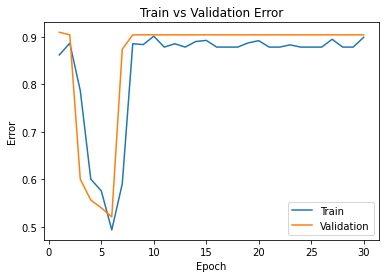

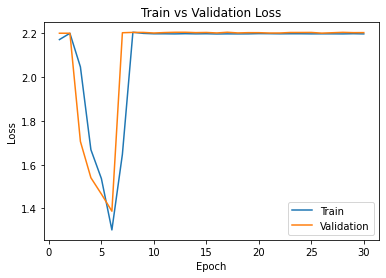

In [ ]:
model_path_3= get_model_name("HandClassifier_3", batch_size=32, learning_rate=0.01, epoch=29)
plot_training_curve(model_path_3)

**Hyperparameter 3:** Add drop out after conv1 and pooling and decrease the batch size + keep lr = 0.01

In [ ]:
class HandClassiferCNN4(nn.Module):
  def __init__(self):
    # The Python super() method lets you access methods in a parent class
    # You can think of super() as a way to jump up 
    # to view the methods in the class from which another class is inherited. 
    super(HandClassiferCNN4, self).__init__()
    self.name="HandClassifier_4"
    # convolution 1 3 input channels since RGB
    self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
    self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
    # convolution 2
    self.conv2 = nn.Conv2d(5, 5, 5) #in_channels, out_chanels, kernel_size
    # flattened (why 53 is from formula)
    self.fc1 = nn.Linear(5*53*53, 32)
    # the output layer should be 9 since we need to predict 9 classes 
    self.fc2 = nn.Linear(32, 9)
    # Define proportion or neurons to dropout
    self.dropout = nn.Dropout(0.25)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x=self.dropout(x)
    x = self.pool(F.relu(self.conv2(x)))
    #x=self.dropout(x)
    x = x.view(-1, 5*53*53)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
Net=HandClassiferCNN4()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  Net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
train_net(Net,data, batch_size=32, learning_rate=0.01, num_epochs=30)

Epoch 1: Train err: 0.8353909465020576, Train loss: 2.1086023736883095 |Validation err: 0.8410958904109589, Validation loss: 3.1556888024012246
Epoch 2: Train err: 0.8830099941211053, Train loss: 2.2133107317818537 |Validation err: 0.904109589041096, Validation loss: 2.200656076272329
Epoch 3: Train err: 0.8783068783068784, Train loss: 2.1968645696286804 |Validation err: 0.904109589041096, Validation loss: 2.2004589637120566
Epoch 4: Train err: 0.8783068783068784, Train loss: 2.1967402078487255 |Validation err: 0.904109589041096, Validation loss: 2.2025394439697266
Epoch 5: Train err: 0.8783068783068784, Train loss: 2.197074947533784 |Validation err: 0.904109589041096, Validation loss: 2.202982564767202
Epoch 6: Train err: 0.8783068783068784, Train loss: 2.197503677120915 |Validation err: 0.904109589041096, Validation loss: 2.202857752641042
Epoch 7: Train err: 0.8783068783068784, Train loss: 2.1976365866484464 |Validation err: 0.904109589041096, Validation loss: 2.2011898159980774
Epo

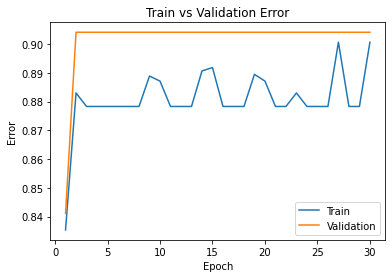

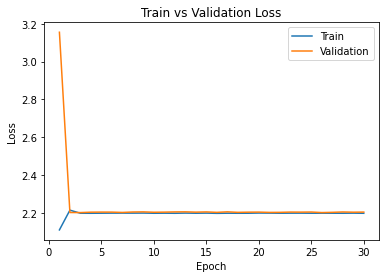

In [ ]:
model_path_4= get_model_name("HandClassifier_4", batch_size=32, learning_rate=0.01, epoch=29)
plot_training_curve(model_path_4)

**Hyperparameter 5:** Let's decrease lr to 0.001 and increase the number of epoch so that our model can learn slowly and maybe avoid overfitting.

In [ ]:
Net=HandClassiferCNN()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  Net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
train_net(Net, data,batch_size=64, learning_rate=0.001, num_epochs=50)

Epoch 1: Train err: 0.8859494415049971, Train loss: 2.199493002008509 |Validation err: 0.904109589041096, Validation loss: 2.199777881304423
Epoch 2: Train err: 0.8783068783068784, Train loss: 2.196790818814878 |Validation err: 0.904109589041096, Validation loss: 2.1973411242167153
Epoch 3: Train err: 0.8783068783068784, Train loss: 2.1908880781244346 |Validation err: 0.904109589041096, Validation loss: 2.192035953203837
Epoch 4: Train err: 0.8765432098765432, Train loss: 2.175708841394495 |Validation err: 0.8301369863013699, Validation loss: 2.1677052974700928
Epoch 5: Train err: 0.7389770723104057, Train loss: 2.1165839742731163 |Validation err: 0.7890410958904109, Validation loss: 2.0590264399846396
Epoch 6: Train err: 0.702527924750147, Train loss: 1.9082587074350428 |Validation err: 0.7068493150684931, Validation loss: 1.834981362024943
Epoch 7: Train err: 0.5920047031158142, Train loss: 1.652588998829877 |Validation err: 0.5698630136986301, Validation loss: 1.6679981350898743
Epo

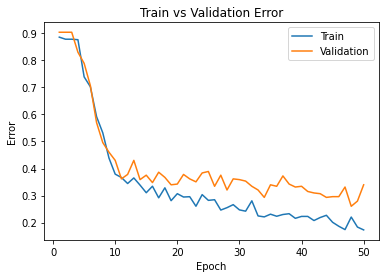

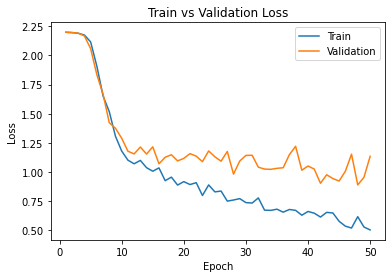

In [ ]:
model_path_5= get_model_name("HandClassifer_1", batch_size=64, learning_rate=0.001, epoch=49)
plot_training_curve(model_path_5)

**Hyperparameter 6:** Add 1 convultions more and change in out channels and keep the same kernel size as 5

In [ ]:
class HandClassiferCNN5(nn.Module):
  def __init__(self):
    # The Python super() method lets you access methods in a parent class
    # You can think of super() as a way to jump up 
    # to view the methods in the class from which another class is inherited. 
    super(HandClassiferCNN5, self).__init__()
    self.name="HandClassifer_5"
    # convolution 1 3 input channels since RGB
    self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
    self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
    # convolution 2
    self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
    # convolution 3
    self.conv3 = nn.Conv2d(10, 15, 5) #in_channels, out_chanels, kernel_size
    # flattened (why 53 is from formula)
    self.fc1 = nn.Linear(15*24*24, 32)
    # the output layer should be 9 since we need to predict 9 classes 
    self.fc2 = nn.Linear(32, 9)
    # Define proportion or neurons to dropout
    
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x=self.pool(F.relu(self.conv3(x)))
    x = x.view(-1, 15*24*24)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)

Did not achieve better results than 8

**Hyperparamter 7: **  add 2 extra convolutions + pooling to the architecture

In [ ]:
class HandClassiferCNN7(nn.Module):
  def __init__(self):
    # The Python super() method lets you access methods in a parent class
    # You can think of super() as a way to jump up 
    # to view the methods in the class from which another class is inherited. 
    super(HandClassiferCNN7, self).__init__()
    self.name="HandClassifier_7"
    # convolution 1 3 input channels since RGB
    self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
    self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
    # convolution 2
    self.conv2 = nn.Conv2d(5, 5, 5) #in_channels, out_chanels, kernel_size
    # convolution 3
    self.conv3 = nn.Conv2d(5, 5, 5)
    #conv 4
    self.conv4 = nn.Conv2d(5, 5, 5)

    self.fc1 = nn.Linear(5*10*10, 32)
    # the output layer should be 9 since we need to predict 9 classes 
    self.fc2 = nn.Linear(32, 9)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x=self.pool(F.relu(self.conv3(x)))
    x=self.pool(F.relu(self.conv4(x)))
    x = x.view(-1, 5*10*10)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
Net=HandClassiferCNN7()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  Net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(Net, data,batch_size=64, learning_rate=0.01, num_epochs=30)

CUDA is available!  Training on GPU ...
Epoch 1: Train err: 0.8824221046443269, Train loss: 2.200072994938603 |Validation err: 0.904109589041096, Validation loss: 2.199456810951233
Epoch 2: Train err: 0.8824221046443269, Train loss: 2.1985084304103144 |Validation err: 0.904109589041096, Validation loss: 2.2002609968185425
Epoch 3: Train err: 0.8824221046443269, Train loss: 2.196726534101698 |Validation err: 0.904109589041096, Validation loss: 2.201070268948873
Epoch 4: Train err: 0.8783068783068784, Train loss: 2.1963702661019786 |Validation err: 0.904109589041096, Validation loss: 2.201448639233907
Epoch 5: Train err: 0.8783068783068784, Train loss: 2.1962762673695884 |Validation err: 0.904109589041096, Validation loss: 2.201648155848185
Epoch 6: Train err: 0.8783068783068784, Train loss: 2.1958781348334417 |Validation err: 0.904109589041096, Validation loss: 2.201764980951945
Epoch 7: Train err: 0.8783068783068784, Train loss: 2.1959429405353688 |Validation err: 0.904109589041096, Va

No need to plot we did not reach good validation error let's try to play with input and output channels of each kernel.

**Hyperparameters 8 ** is the same as 7 but now we changed the output channels of the kernels

In [ ]:
class HandClassiferCNN8(nn.Module):
  def __init__(self):
    # The Python super() method lets you access methods in a parent class
    # You can think of super() as a way to jump up 
    # to view the methods in the class from which another class is inherited. 
    super(HandClassiferCNN8, self).__init__()
    self.name="HandClassifier_8"
    # convolution 1 3 input channels since RGB
    self.conv1 = nn.Conv2d(3, 5, 5) #in_channels, out_chanels, kernel_size
    self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride 
    # convolution 2
    self.conv2 = nn.Conv2d(5, 10, 5) #in_channels, out_chanels, kernel_size
    # convolution 3
    self.conv3 = nn.Conv2d(10, 15, 5)
    #conv 4
    self.conv4 = nn.Conv2d(15, 20, 5)

    self.fc1 = nn.Linear(20*10*10, 32)
    # the output layer should be 9 since we need to predict 9 classes 
    self.fc2 = nn.Linear(32, 9)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x=self.pool(F.relu(self.conv3(x)))
    x=self.pool(F.relu(self.conv4(x)))
    x = x.view(-1, 20*10*10)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [ ]:
Net=HandClassiferCNN8()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  Net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

CUDA is available!  Training on GPU ...


In [ ]:
train_net(Net, data,batch_size=64, learning_rate=0.01, num_epochs=30)

Epoch 1: Train err: 0.8959435626102292, Train loss: 2.202827118061207 |Validation err: 0.8849315068493151, Validation loss: 2.200918992360433
Epoch 2: Train err: 0.8871252204585538, Train loss: 2.199600405163235 |Validation err: 0.904109589041096, Validation loss: 2.199843684832255
Epoch 3: Train err: 0.8783068783068784, Train loss: 2.1961587535010443 |Validation err: 0.904109589041096, Validation loss: 2.200607697168986
Epoch 4: Train err: 0.8765432098765432, Train loss: 2.192498313056098 |Validation err: 0.8931506849315068, Validation loss: 2.1977750062942505
Epoch 5: Train err: 0.8195179306290418, Train loss: 2.1526497028492115 |Validation err: 0.8, Validation loss: 2.023570636908213
Epoch 6: Train err: 0.6854791299235743, Train loss: 1.8893270404250533 |Validation err: 0.5424657534246575, Validation loss: 1.6630480885505676
Epoch 7: Train err: 0.48677248677248675, Train loss: 1.4751725373444733 |Validation err: 0.5178082191780822, Validation loss: 1.5422638257344563
Epoch 8: Train 

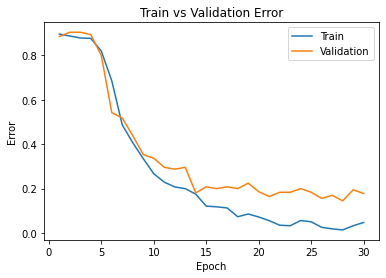

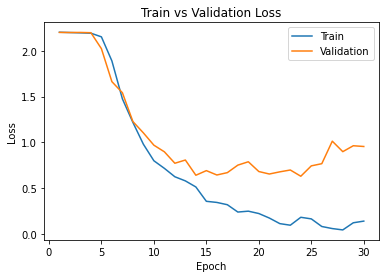

In [ ]:
model_path_8= get_model_name("HandClassifier_8", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(model_path_8)

In [ ]:
Net=HandClassiferCNN8()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  Net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(Net, data,batch_size=64, learning_rate=0.01, num_epochs=40)

CUDA is available!  Training on GPU ...
Epoch 1: Train err: 0.8959435626102292, Train loss: 2.2028270915702537 |Validation err: 0.8849315068493151, Validation loss: 2.2009185552597046
Epoch 2: Train err: 0.8865373309817755, Train loss: 2.1996001137627497 |Validation err: 0.904109589041096, Validation loss: 2.1998531421025596
Epoch 3: Train err: 0.8783068783068784, Train loss: 2.196157623220373 |Validation err: 0.904109589041096, Validation loss: 2.2006070613861084
Epoch 4: Train err: 0.8771310993533216, Train loss: 2.192452209967154 |Validation err: 0.8931506849315068, Validation loss: 2.1977983713150024
Epoch 5: Train err: 0.8148148148148149, Train loss: 2.151210422869082 |Validation err: 0.8, Validation loss: 2.018274704615275
Epoch 6: Train err: 0.6995884773662551, Train loss: 1.9019780953725178 |Validation err: 0.6712328767123288, Validation loss: 1.718575358390808
Epoch 7: Train err: 0.5126396237507349, Train loss: 1.4421645756121035 |Validation err: 0.4246575342465754, Validation

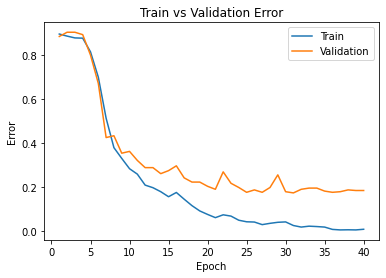

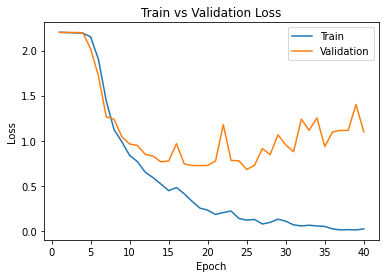

In [ ]:
model_path_9= get_model_name("HandClassifier_8", batch_size=64, learning_rate=0.01, epoch=39)
plot_training_curve(model_path_9)

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

As I did in lab 1 I will choose based on the lowest validation error and this was achieved using HandClassiferCNN8 named 'HandClassifier8. at 
Epoch 30: Train err: 0.015873015873015928, Train loss: 0.061435212967572386 |Validation err: 0.1424657534246575, Validation loss: 0.7440810352563858

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
Net = HandClassiferCNN8()
use_cuda = True

if use_cuda and torch.cuda.is_available():
  Net.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

model_path_final = get_model_name(Net.name, batch_size=64, learning_rate=0.01, epoch=35)
state = torch.load(model_path_final)
Net.load_state_dict(state)

train_loader, val_loader, test_loader= get_data_loader(data,batch_size=64)

evaluate(Net, test_loader, nn.CrossEntropyLoss())

CUDA is available!  Training on GPU ...


(0.1698630136986301, 1.4003462344408035)

We achieved an error 0f 16.98 % on testing which means 83.02 % testing accuracy (1-error) which is Good.

### Part 4. Transfer Learning [8 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 2 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
train_loader, val_loader, test_loader=get_data_loader(data,64)

features_train=[]
for sample,label in iter(train_loader):
  feat=alexnet.features(sample)
  features_train.append((feat,label))

features_val=[]
for sample,label in iter(val_loader):
  feat=alexnet.features(sample)
  features_val.append((feat,label))

features_test=[]
for sample,label in iter(test_loader):
  feat=alexnet.features(sample)
  features_test.append((feat,label))

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [ ]:
features_train

[(tensor([[[[0.0000e+00, 0.0000e+00, 1.0437e-01, 1.0437e-01, 0.0000e+00,
             0.0000e+00],
            [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
             0.0000e+00],
            [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
             0.0000e+00],
            [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.7998e-03,
             0.0000e+00],
            [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.9750e-01,
             0.0000e+00],
            [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
             0.0000e+00]],
  
           [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
             0.0000e+00],
            [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
             0.0000e+00],
            [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
             0.0000e+00],
            [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
             0.0000e+00],
      

### Part (b) - 2 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

We do not need convolutional nn since we got features from alexnet transfer learning we only need FC layers. Input to FC1 is 256 * 6 * 6 and this is input to first layer and then output 20 and input to FC2 output of the second layer is 9 labels. Use relu also. I will try this 2 FC layers and if they give good results no need to addd more.

In [ ]:
# features = ... load precomputed alexnet.features(img) ...
class AlexNetFC(nn.Module):
    def __init__(self):
        super(AlexNetFC, self).__init__()
        self.fc1 = nn.Linear(256 * 6 * 6, 20)
        self.fc2 = nn.Linear(20, 9)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6) #flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Part (c) - 2 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
# take from prelab2b

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def get_accuracy(model, train=False):
    if train:
        data_loader = features_train
    else:
        data_loader = features_val

    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
        
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          #imgs = torch.from_numpy(imgs.detach().numpy())
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, feat, batch_size=64, num_epochs=1):
    #train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
  
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(feat):
          
            imgs = torch.from_numpy(imgs.detach().numpy())
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

CUDA is available!  Training on GPU ...


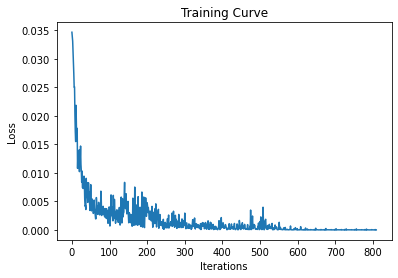

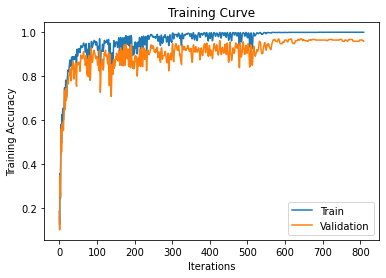

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.958904109589041


In [ ]:
import matplotlib.pyplot as plt

use_cuda = True

model = AlexNetFC()

if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
  
train(model, features_train, num_epochs=30)

Validation accuracy of 95.89 % ! The code is taken from prela 2 b

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

form prelab 1b

In [ ]:
def get_accuracy(model,feat):

    correct = 0
    total = 0
    for imgs, labels in feat:
        
        #imgs = alexNet.features(imgs) #SLOW
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
get_accuracy(model,features_test)

0.9068493150684932

Higher testing accuracy than part 3 d without using transfer learning and this is logical then.

### Part 5. Testing on New Data [10 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted with your lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 



### Part (a) - 3 pt
Load and process the hand gesture images you had collected so that they can easily be evaulated by your model.

In [ ]:
testingmyhands=torch.utils.data.DataLoader(data2,shuffle=True)

In [ ]:
new_testing=[]
for sample,label in iter(testingmyhands):
  feat=alexnet.features(sample)
  new_testing.append((feat,label))

In [ ]:
for sample,label in iter(testingmyhands):
  print(label)

tensor([5])
tensor([6])
tensor([4])
tensor([2])
tensor([4])
tensor([2])
tensor([5])
tensor([1])
tensor([3])
tensor([7])
tensor([1])
tensor([3])
tensor([6])
tensor([3])
tensor([0])
tensor([0])
tensor([4])
tensor([8])
tensor([0])
tensor([8])
tensor([8])
tensor([2])
tensor([1])
tensor([7])
tensor([6])
tensor([5])
tensor([7])


### Part (b) - 7 pt
Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?  

This question will also be evaluated on the overal performance achieved.

In [ ]:
correct = 0
total = 0
predic=[]
labils=[]

for imgs, labels in new_testing:
  if use_cuda and torch.cuda.is_available():
    imgs = imgs.cuda()
    labels = labels.cuda()
  output = model(imgs)
        
  pred = output.max(1, keepdim=True)[1]
  pred=pred.cpu()
  pred2=(pred.detach().numpy()).reshape(1,-1)[0]
  predic.append(pred2)
  labels=labels.cpu()
  labels2=(labels.detach().numpy()).reshape(1,-1)[0]
  labils.append(labels2)
  correct += pred.eq(labels.view_as(pred)).sum().item()
  total += imgs.shape[0]
print("Accuracy of my predicting the pictures of my hands is:", correct/total)

Accuracy of my predicting the pictures of my hands is: 1.0


In [ ]:
predic

[array([5]),
 array([1]),
 array([1]),
 array([6]),
 array([6]),
 array([3]),
 array([4]),
 array([3]),
 array([1]),
 array([2]),
 array([0]),
 array([0]),
 array([8]),
 array([0]),
 array([7]),
 array([2]),
 array([5]),
 array([2]),
 array([4]),
 array([6]),
 array([5]),
 array([8]),
 array([7]),
 array([7]),
 array([4]),
 array([8]),
 array([3])]

In [ ]:
labils

[array([5]),
 array([1]),
 array([1]),
 array([6]),
 array([6]),
 array([3]),
 array([4]),
 array([3]),
 array([1]),
 array([2]),
 array([0]),
 array([0]),
 array([8]),
 array([0]),
 array([7]),
 array([2]),
 array([5]),
 array([2]),
 array([4]),
 array([6]),
 array([5]),
 array([8]),
 array([7]),
 array([7]),
 array([4]),
 array([8]),
 array([3])]

The accuracy is 100% so the data was preprocessed in a very good way and the pictures were taken clearly.

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html Final_version_lab2.ipynb

[NbConvertApp] Converting notebook Final_version_lab2.ipynb to html
[NbConvertApp] Writing 1527607 bytes to Final_version_lab2.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus